In [3]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import sys
sys.path.append('../')

from src.algo.pg import PGAgent
from src.envs import InvPendulumNLEnvPartialNorm

In [4]:
# rnn_path = '../data/iqcrnn/pendulum_partial_norm_rnn_09-05-2022_22-40-48/2/'
rnn_path = '../data/iqcrnn/pendulumNL_partial_norm_rnn_proj_10-05-2022_09-07-12/2/'

prefs = ['best_', 'e000_', 'e100_', 'e200_', 'e300_', 'e400_', 'e500_']

agents = {
    px[:-1]: PGAgent.load(rnn_path + px)
    for px in prefs
}
agents

{'best': <src.algo.pg.PGAgent at 0x13a3bcd68>,
 'e000': <src.algo.pg.PGAgent at 0x13a3bcd30>,
 'e100': <src.algo.pg.PGAgent at 0x13a3bcf28>,
 'e200': <src.algo.pg.PGAgent at 0x13a40eb70>,
 'e300': <src.algo.pg.PGAgent at 0x13a42ee80>,
 'e400': <src.algo.pg.PGAgent at 0x13a442048>,
 'e500': <src.algo.pg.PGAgent at 0x13a442710>}

In [5]:
env = InvPendulumNLEnvPartialNorm(
    factor=1e-1,
    # max_torque=10000,
)
env.max_torque = 10_000
env

/Users/hunterheidenreich/git/IQCRNN_PyTorch/venv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [8]:
def get_traj_plot(agent, n=9, horizon=100, save_path=None):
    xs = np.linspace(-1, 1, n)
    ys = np.linspace(-2, 2, n)

    plt.figure(dpi=150, figsize=(3.2, 4.8))
    plt.xlim(-1, 1)
    plt.ylim(-2, 2)

    for x in tqdm(xs):
        for y in ys:
            states = agent.sample_trajectory(env, False, init_state=[x, y], horizon=horizon, sample=False)['state']
            # print(states.shape)

            if np.linalg.norm(states[-1]) > 0.7:
                c="tab:red"
                # print('RED', states[-1])
            else:
                c="tab:green"
                # continue

            plt.plot(states[:, 0], states[:, 1], color=c, linewidth=0.5)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    if save_path is None:
        plt.show()
    else:
        plt.tight_layout()
        plt.savefig(save_path)

100%|██████████| 9/9 [00:05<00:00,  1.51it/s]


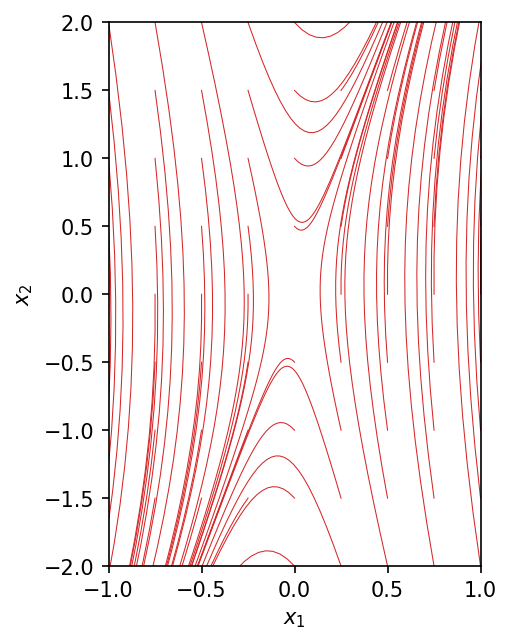

In [9]:
get_traj_plot(agents['e000'])

100%|██████████| 9/9 [00:05<00:00,  1.51it/s]


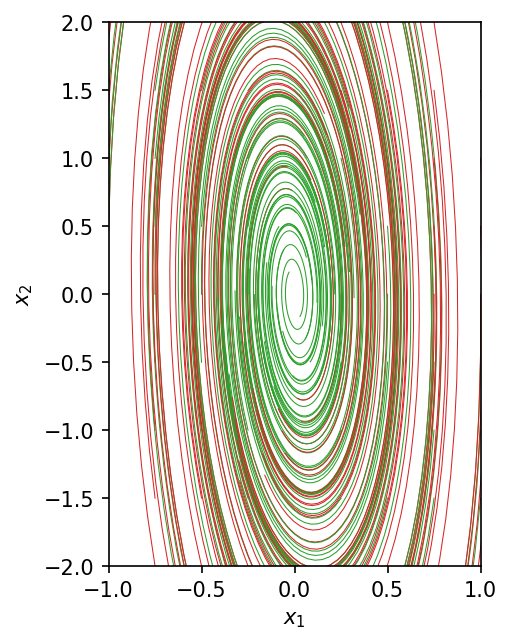

In [10]:
get_traj_plot(agents['e100'])

100%|██████████| 9/9 [00:07<00:00,  1.19it/s]


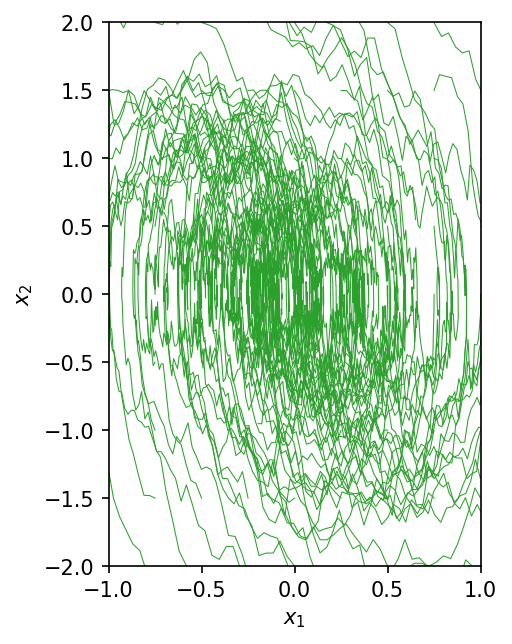

In [7]:
get_traj_plot(agents['e200'])

100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


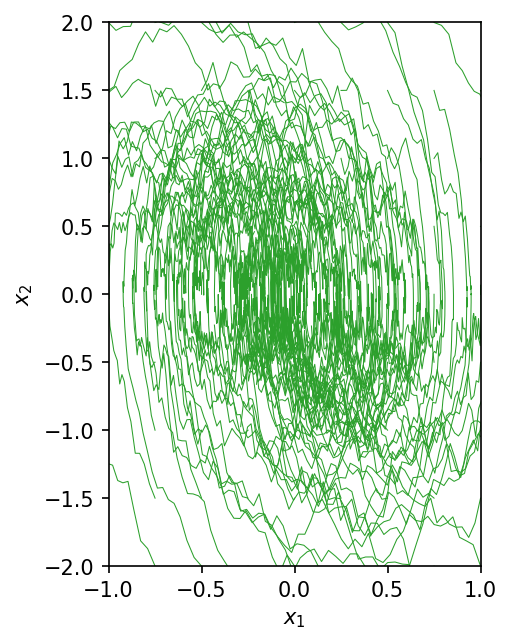

In [8]:
get_traj_plot(agents['e300'])

In [9]:
get_traj_plot(agents['e400'])

 67%|██████▋   | 6/9 [00:05<00:02,  1.14it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/hunterheidenreich/git/IQCRNN_PyTorch/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-0790fd9834a6>", line 1, in <module>
    get_traj_plot(agents['e400'])
  File "<ipython-input-4-091d26d12d9e>", line 11, in get_traj_plot
    states = agent.sample_trajectory(env, False, init_state=[x * .1, y * .1], horizon=horizon)['state']
  File "../src/algo/pg.py", line 162, in sample_trajectory
    ac_mean, xi, _, ac, log_p = self.rnn.forward(ob, xi=xi, sample=sample)
  File "../src/algo/nets/rnns.py", line 417, in forward
    dist = Normal(u, (eps + log_std).exp())
  File "/Users/hunterheidenreich/git/IQCRNN_PyTorch/venv/lib/python3.6/site-packages/torch/distributions/normal.py", line 50, in __init__
    super(Normal, self).__init__(batch_shape, validate_args=validate_args)
  File "/Users/hunterheidenreich/git/IQCRNN_PyTorch/ven


KeyboardInterrupt



Error in callback <function flush_figures at 0x11d0ae1e0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
get_traj_plot(agents['e500'])

100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


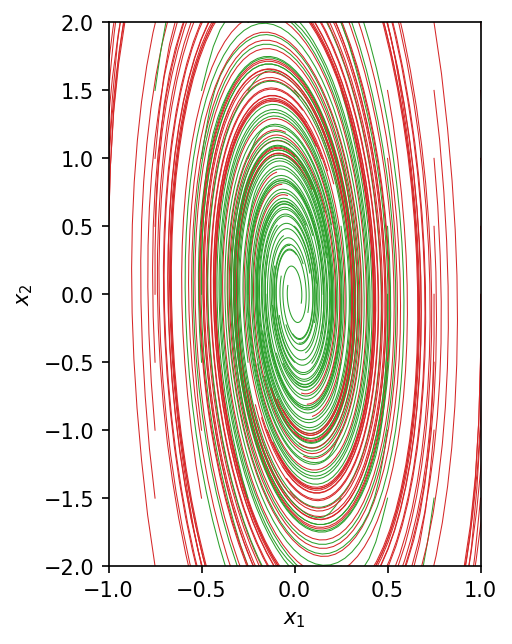

In [11]:
get_traj_plot(agents['best'])

100%|██████████| 9/9 [00:06<00:00,  1.37it/s]


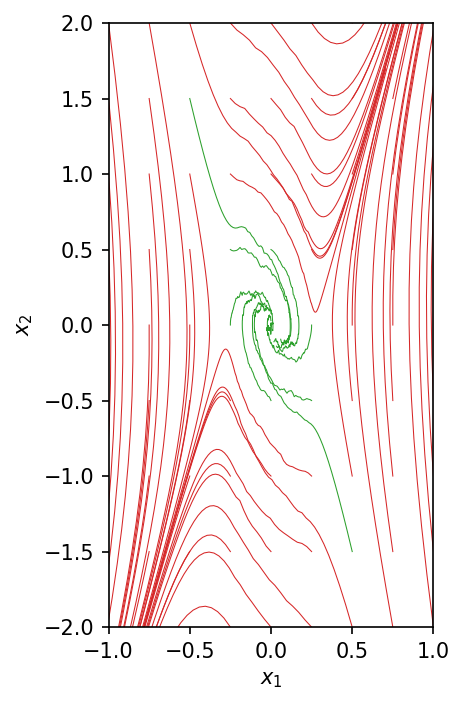

In [61]:
# ptx = '../figs/pendulum_rnn_trunc.png'
# ptx = '../figs/pendulum_rnn_unif.png'
ptx = '../figs/pendulum_proj_trunc.png'

get_traj_plot(agents['best'], save_path=ptx)